In [2]:
%run init.ipynb
%run init-quantum_gates.ipynb

# Dense Coding

Adapted from: https://github.com/jonasmaziero/qiskit2/blob/main/09_dense_coding.ipynb

Super-dense coding (CSD) is a way of __sending 2 cbits by sending "only" 1 qubit__ (with some details to be discussed below). The protocol was proposed in
* Bennett, Charles H., and Stephen J. Wiesner. “Communication via One- and Two-Particle Operators on Einstein-Podolsky-Rosen States.” Phys. Rev. Lett. 69, 2881 (1992).

Alice prepares a pair of entangled photons, say

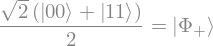

In [34]:
Φ_p = pbk('P')
x = mysim(mbk(Φ_p))
Eq(x, Ket('\Phi_+'))

and sendsone of these qubits to Bob. Bob in turn performs some operations in his laboratory with the specific intention of sending certain information to Alice. Bob can have Alice receive $00, 01, 10$ or $11$. For this Bob needs to return his qubit to Alice, so Alice will carry out measurements in her laboratory to reveal the message sent by Bob.

Consider that the left qubit will be with Alice (qubit position $1$) and the right qubit she will send to Bob (qubit position $0$).

Bob realizes that if he performs some operations on the qubit he received from Alice, the global entangled state can be modified to produce other Bell base states. The first case is when Bob receives the qubit and decides not to perform any operation, obviously the state remains the same ($|\Phi_+\rangle$). Now if Bob operates the $Z$ gate, we have

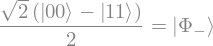

In [30]:
Φ_m = gatep(pauli(3), Φ_p, 0)
x = mysim(mbk(Φ_m))
Eq(x, Ket('\Phi_-'))

where the $Z$ gate is

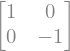

In [26]:
pauli(3)

If Bob current to pauli X, we have

In [31]:
Ψ_m = gatep(pauli(1), Φ_p, 0)
x = mysim(mbk(Ψ_m))
Eq(x, Ket('Ψ_+'))

where the $X$ is

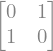

In [28]:
pauli(1)

And if Bob simultaneously acts on the $XZ$ gates, it follows that

In [33]:
Φ_m = gatep(pauli(1)*pauli(3), Φ_p, 0)
x = mysim(mbk(Φ_m))
Eq(x, Ket('Ψ_-'))

With this, Bob will be able to convert $|\Phi_+\rangle$ as the following

\begin{align}
(\mathbb{1}\otimes \mathbb{1})&|\Phi_+\rangle \longrightarrow |\Phi_+\rangle\\
(\mathbb{1}\otimes X)         &|\Phi_+\rangle \longrightarrow |\Psi_+\rangle\\
(\mathbb{1}\otimes Z)         &|\Phi_+\rangle \longrightarrow |\Phi_-\rangle\\
(\mathbb{1}\otimes ZX)        &|\Phi_+\rangle \longrightarrow |\Psi_-\rangle
\end{align}

After receiving back the qubit, Alice will perform the measurement to reveal the message. Considering that it can only make measurements in the computational base, it is necessary to apply the $CNOT$ gate (with control on qubit 1 and target on qubit 0) and actuate the gate $H$ on qubit $1$. So Alice will convert the Bell base to the computational base, analogous to what we did in the [teleportation protocol](https://github.com/StarkeDg/Dirac-notation--analytics-in-python/blob/main/03.00-protocol-teleportation.ipynb), so you will get:
- $|\Phi_+\rangle \longrightarrow |00\rangle$
- $|\Psi_+\rangle \longrightarrow |01\rangle$
- $|\Phi_-\rangle \longrightarrow |10\rangle$
- $|\Psi_-\rangle \longrightarrow |11\rangle$

And after the measurement, Alice will know what operation Bob performed as well as the message he sent.